NEPAL SEVI PROJECT - RESULTS DASHBOARD
Creating clear, presentation-ready visualizations

STEP 1: LOADING RESULTS DATA
------------------------------------------------------------
Loading SEVI data with predictions...
Loaded 77 districts

Loading clustering results...
Loaded clustering for 77 districts

Loading classification model results...
Model comparison results loaded (3 models)
Loaded feature importance for 3 models

Final dataset: 77 districts

STEP 2: CREATING DASHBOARD

Saved professional dashboard: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\dashboard\professional_dashboard.png

STEP 3: CREATING EXECUTIVE SUMMARY
Saved executive summary: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\dashboard\executive_summary.png

STEP 4: CREATING KEY METRICS
Saved key metrics table: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results\dashboard\key_metrics.png

VISUALIZATION COMPLETE

FILES CREATED:
1. Professional Dashboard: C:\Users\saurav\Downloads\SEVI_NEPAL_Project\res

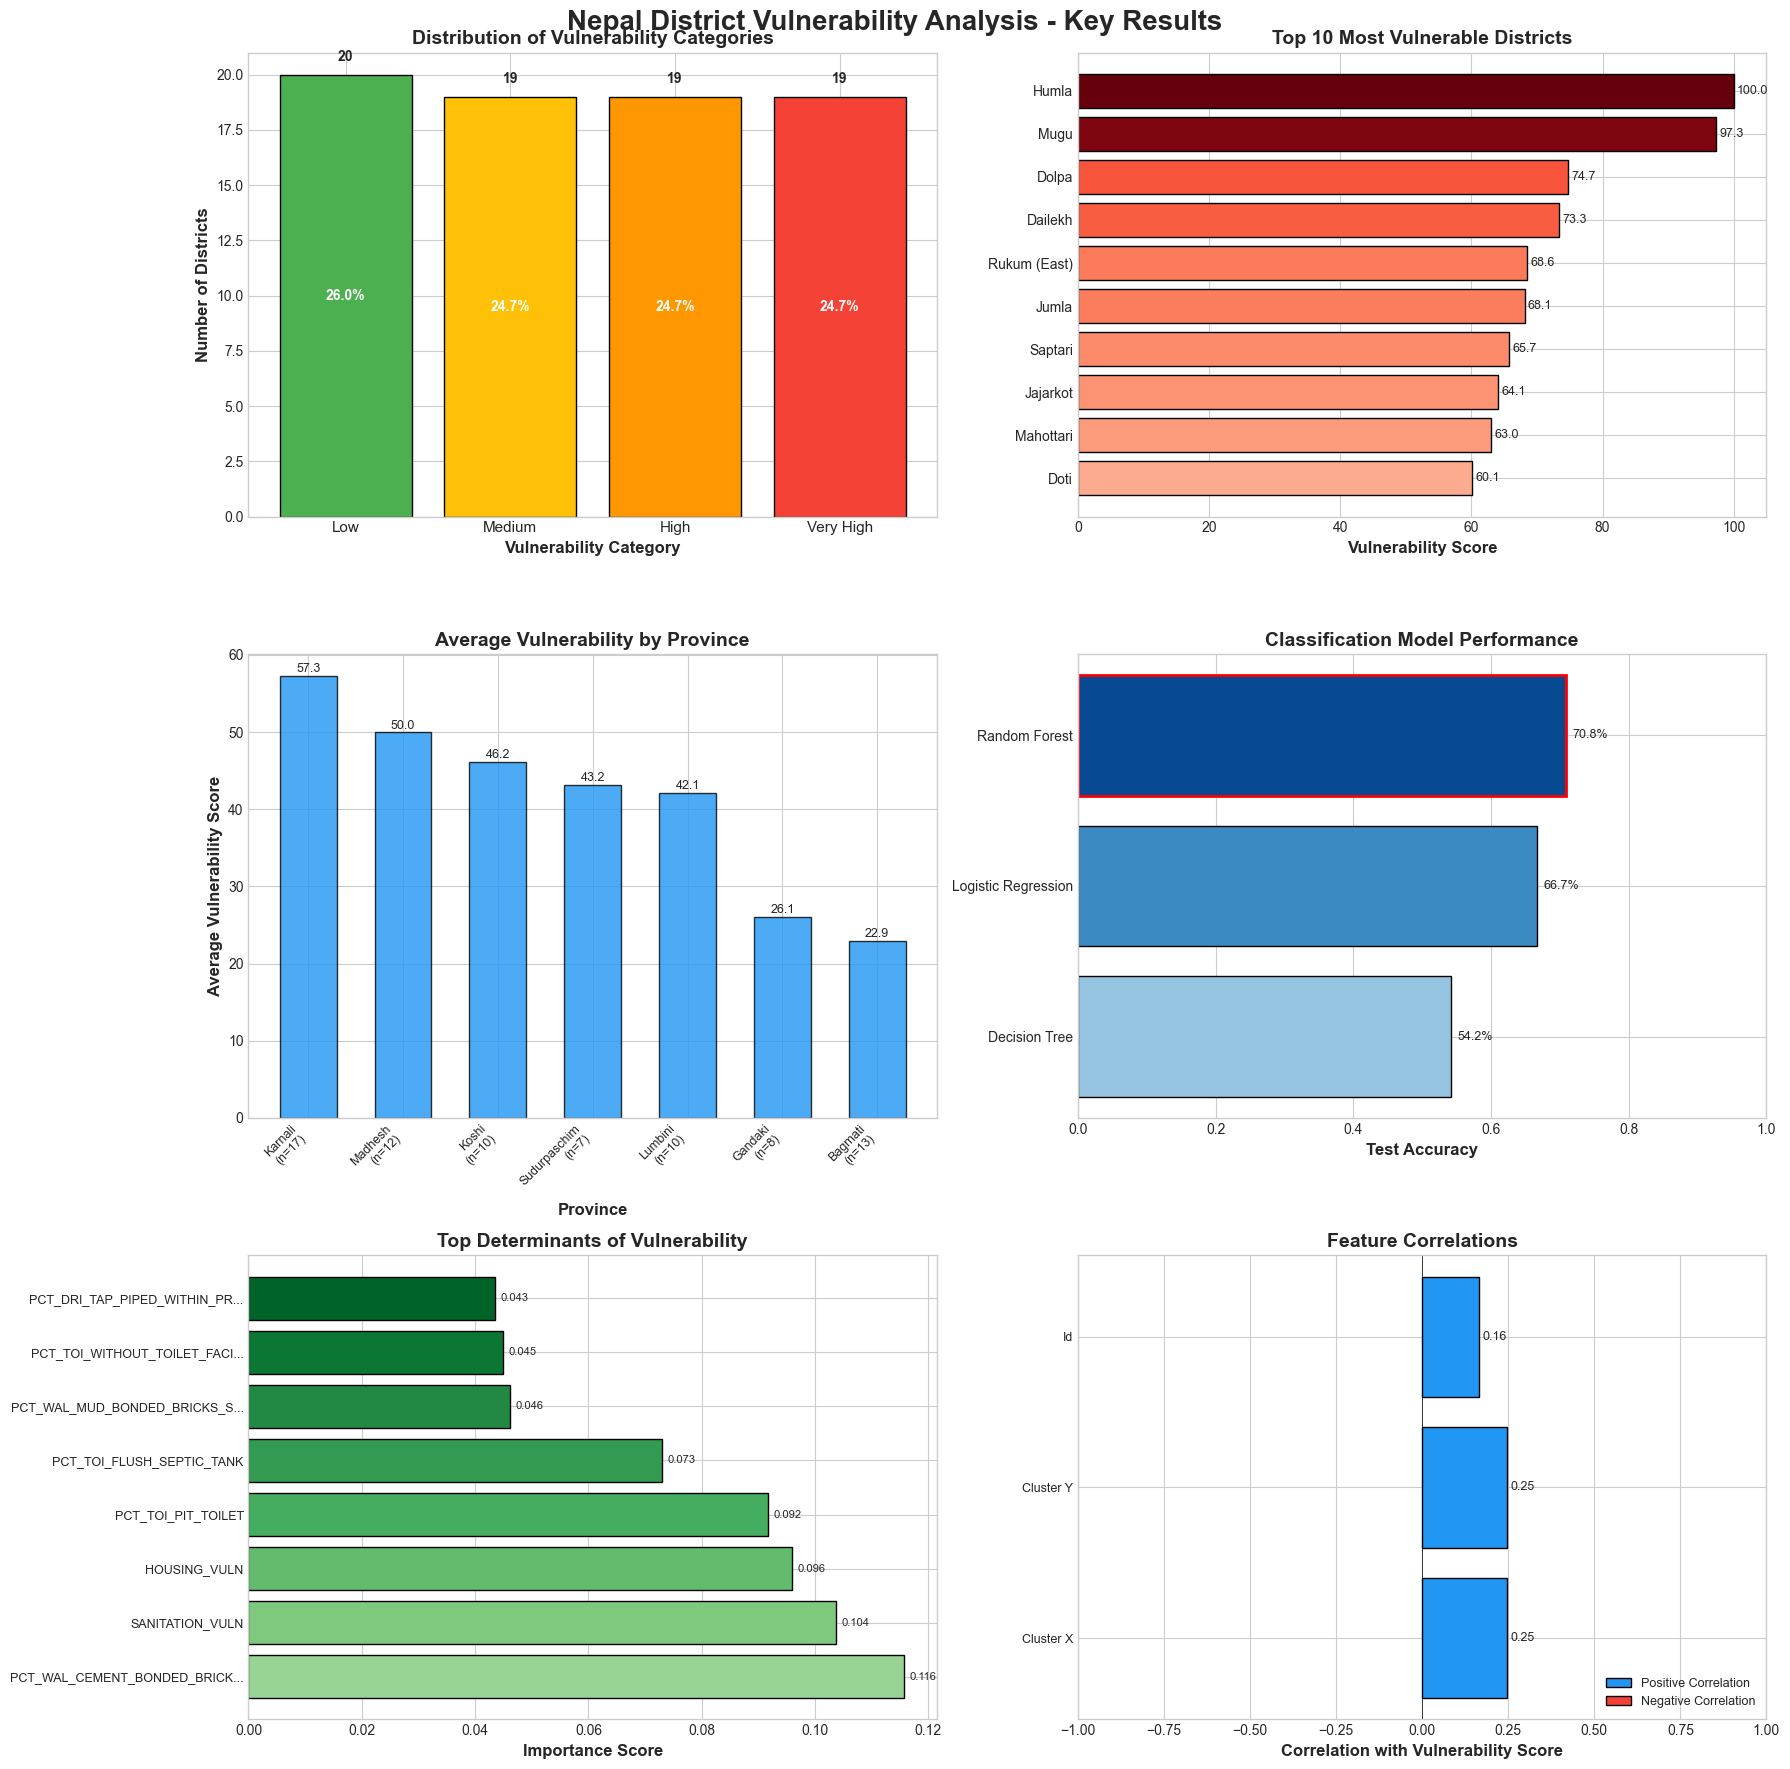

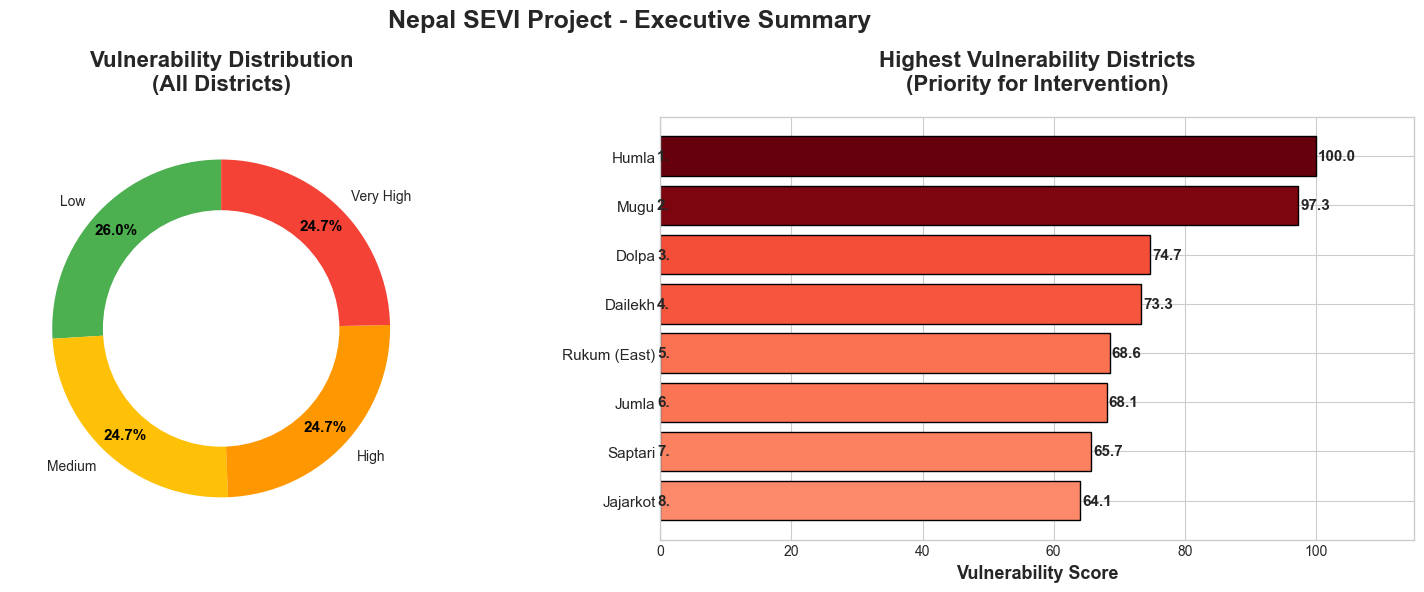

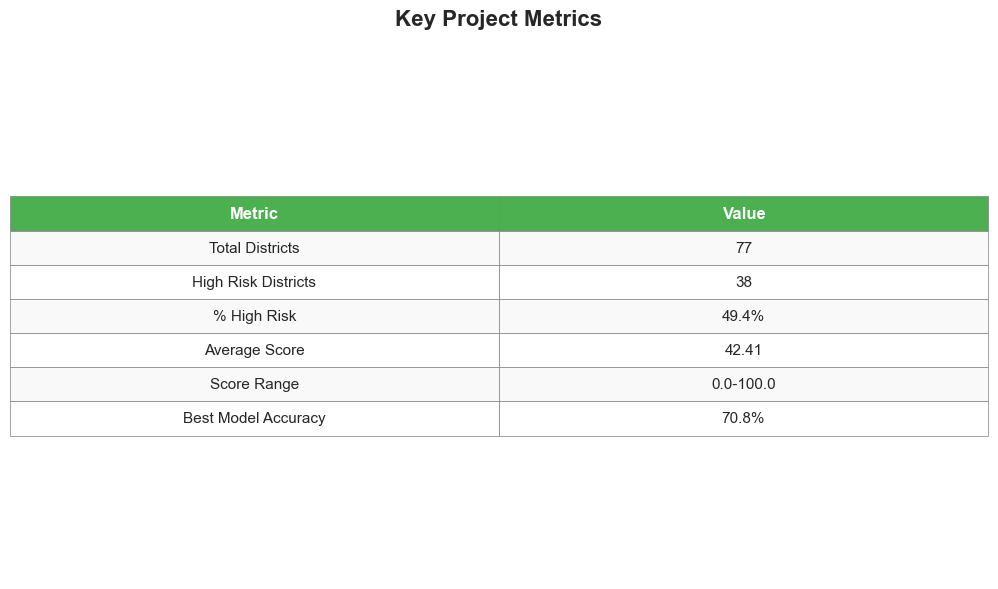

In [2]:
"""
Nepal SEVI Project - Simplified Results Visualization
Final Dashboard: Clear and Professional Visualizations
Author: [Your Name]
Date: [Today's Date]
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Setup
FINAL_PATH = Path(r'C:\Users\saurav\Downloads\SEVI_NEPAL_Project\data\final')
RESULTS_PATH = Path(r'C:\Users\saurav\Downloads\SEVI_NEPAL_Project\results')
DASHBOARD_PATH = RESULTS_PATH / 'dashboard'
DASHBOARD_PATH.mkdir(parents=True, exist_ok=True)

print("="*60)
print("NEPAL SEVI PROJECT - RESULTS DASHBOARD")
print("="*60)
print("Creating clear, presentation-ready visualizations")
print("="*60)

# ============================================================================
# STEP 1: Load All Results
# ============================================================================
print("\nSTEP 1: LOADING RESULTS DATA")
print("-"*60)

# Load SEVI data
print("Loading SEVI data with predictions...")
try:
    sevi_data = pd.read_csv(FINAL_PATH / 'nepal_districts_classification_predictions.csv')
    print(f"Loaded {len(sevi_data)} districts")
except FileNotFoundError:
    print("SEVI data file not found")
    sevi_data = pd.DataFrame()

# Load clustering results
print("\nLoading clustering results...")
try:
    clustering_results = pd.read_csv(FINAL_PATH / 'nepal_districts_clustering_results.csv')
    print(f"Loaded clustering for {len(clustering_results)} districts")
except FileNotFoundError:
    print("Clustering results file not found")
    clustering_results = pd.DataFrame()

# Load classification model results
print("\nLoading classification model results...")
try:
    model_path = RESULTS_PATH / 'classification' / 'model_comparison_results.csv'
    if model_path.exists():
        model_results = pd.read_csv(model_path)
        if not model_results.empty:
            print(f"Model comparison results loaded ({len(model_results)} models)")
    else:
        print("Model results file not found")
        model_results = pd.DataFrame()
except Exception as e:
    print(f"Error loading model results: {e}")
    model_results = pd.DataFrame()

# Load feature importance
feature_importance_data = {}
try:
    feature_files = list((RESULTS_PATH / 'classification').glob('feature_importance_*.csv'))
    for file in feature_files:
        try:
            model_name = file.stem.replace('feature_importance_', '').replace('_', ' ').title()
            df = pd.read_csv(file)
            if not df.empty:
                feature_importance_data[model_name] = df
        except:
            continue
    if feature_importance_data:
        print(f"Loaded feature importance for {len(feature_importance_data)} models")
except:
    pass

# Merge all data
if not sevi_data.empty and not clustering_results.empty:
    all_data = pd.merge(
        sevi_data,
        clustering_results[['DISTRICT_NAME', 'CLUSTER']],
        on='DISTRICT_NAME',
        how='left'
    )
    print(f"\nFinal dataset: {len(all_data)} districts")
elif not sevi_data.empty:
    all_data = sevi_data.copy()
else:
    print("No data available")
    all_data = pd.DataFrame()

# ============================================================================
# STEP 2: Create Professional Dashboard
# ============================================================================
print("\n" + "="*60)
print("STEP 2: CREATING DASHBOARD")
print("="*60)

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Nepal District Vulnerability Analysis - Key Results', 
             fontsize=20, fontweight='bold', y=0.98)

# Panel 1: Vulnerability Distribution
ax1 = axes[0, 0]
if not all_data.empty and 'VULNERABILITY_CATEGORY' in all_data.columns:
    category_counts = all_data['VULNERABILITY_CATEGORY'].value_counts()
    
    # Sort by custom order if possible
    category_order = ['Low', 'Medium', 'High', 'Very High']
    for cat in category_order:
        if cat not in category_counts.index:
            category_counts[cat] = 0
    category_counts = category_counts.reindex(category_order)
    
    # Create bar chart
    colors = ['#4CAF50', '#FFC107', '#FF9800', '#F44336']
    bars = ax1.bar(range(len(category_counts)), category_counts.values, 
                   color=colors, edgecolor='black', linewidth=1)
    
    ax1.set_xlabel('Vulnerability Category', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Number of Districts', fontsize=12, fontweight='bold')
    ax1.set_title('Distribution of Vulnerability Categories', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(category_counts)))
    ax1.set_xticklabels(category_counts.index, fontsize=11)
    
    # Add value labels
    for bar, count in zip(bars, category_counts.values):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                str(int(count)), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add percentage labels
    total = category_counts.sum()
    percentages = (category_counts.values / total * 100).round(1)
    for bar, perc in zip(bars, percentages):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                f'{perc}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'No vulnerability data', ha='center', va='center', fontsize=12)
    ax1.set_title('Vulnerability Distribution', fontsize=14, fontweight='bold')
    ax1.axis('off')

# Panel 2: Top Vulnerable Districts
ax2 = axes[0, 1]
if not all_data.empty and 'VULNERABILITY_SCORE' in all_data.columns and 'DISTRICT_NAME' in all_data.columns:
    top_districts = all_data.nlargest(10, 'VULNERABILITY_SCORE')
    
    y_pos = np.arange(len(top_districts))
    
    # Color by score gradient
    scores = top_districts['VULNERABILITY_SCORE'].values
    min_score, max_score = scores.min(), scores.max()
    if max_score > min_score:
        normalized_scores = (scores - min_score) / (max_score - min_score)
        colors = plt.cm.Reds(0.3 + 0.7 * normalized_scores)
    else:
        colors = ['#F44336'] * len(scores)
    
    bars = ax2.barh(y_pos, scores, color=colors, edgecolor='black', linewidth=1)
    
    ax2.set_yticks(y_pos)
    district_labels = [str(name)[:20] for name in top_districts['DISTRICT_NAME'].tolist()]
    ax2.set_yticklabels(district_labels, fontsize=10)
    ax2.invert_yaxis()
    ax2.set_xlabel('Vulnerability Score', fontsize=12, fontweight='bold')
    ax2.set_title('Top 10 Most Vulnerable Districts', fontsize=14, fontweight='bold')
    
    # Add score labels
    for bar, score in zip(bars, scores):
        ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{score:.1f}', va='center', fontsize=9)
else:
    ax2.text(0.5, 0.5, 'No district data', ha='center', va='center', fontsize=12)
    ax2.set_title('Top Districts', fontsize=14, fontweight='bold')
    ax2.axis('off')

# Panel 3: Province-wise Analysis
ax3 = axes[1, 0]
if not all_data.empty and 'PROVINCE' in all_data.columns and 'VULNERABILITY_SCORE' in all_data.columns:
    province_stats = all_data.groupby('PROVINCE')['VULNERABILITY_SCORE'].agg(['mean', 'count']).round(2)
    province_stats = province_stats.sort_values('mean', ascending=False)
    
    x = np.arange(len(province_stats))
    width = 0.6
    
    bars = ax3.bar(x, province_stats['mean'], width, color='#2196F3', alpha=0.8, edgecolor='black')
    
    ax3.set_xlabel('Province', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Average Vulnerability Score', fontsize=12, fontweight='bold')
    ax3.set_title('Average Vulnerability by Province', fontsize=14, fontweight='bold')
    ax3.set_xticks(x)
    
    # Shorten province names if needed
    labels = []
    for idx, (prov, row) in enumerate(province_stats.iterrows()):
        prov_name = str(prov)
        if len(prov_name) > 12:
            prov_name = prov_name[:10] + '...'
        labels.append(f'{prov_name}\n(n={int(row["count"])})')
    
    ax3.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
    
    # Add value labels
    for bar, mean_score in zip(bars, province_stats['mean']):
        ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                f'{mean_score:.1f}', ha='center', va='bottom', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'No province data', ha='center', va='center', fontsize=12)
    ax3.set_title('Province Analysis', fontsize=14, fontweight='bold')
    ax3.axis('off')

# Panel 4: Model Performance
ax4 = axes[1, 1]
if not model_results.empty and len(model_results) > 0:
    models = model_results['Model'].values
    test_acc = model_results['Test Accuracy'].values
    
    # Sort by accuracy
    sorted_idx = np.argsort(test_acc)
    models = models[sorted_idx]
    test_acc = test_acc[sorted_idx]
    
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(models)))
    bars = ax4.barh(range(len(models)), test_acc, color=colors, edgecolor='black', linewidth=1)
    
    ax4.set_yticks(range(len(models)))
    ax4.set_yticklabels(models, fontsize=10)
    ax4.set_xlabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax4.set_title('Classification Model Performance', fontsize=14, fontweight='bold')
    ax4.set_xlim(0, max(1.0, test_acc.max() + 0.1))
    
    # Add accuracy labels
    for i, (bar, acc) in enumerate(zip(bars, test_acc)):
        ax4.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f'{acc:.1%}', va='center', fontsize=9)
    
    # Highlight best model
    best_idx = len(models) - 1  # Since we sorted ascending
    bars[best_idx].set_edgecolor('red')
    bars[best_idx].set_linewidth(2)
else:
    ax4.text(0.5, 0.5, 'No model results', ha='center', va='center', fontsize=12)
    ax4.set_title('Model Performance', fontsize=14, fontweight='bold')
    ax4.axis('off')

# Panel 5: Feature Importance
ax5 = axes[2, 0]
if feature_importance_data and not model_results.empty:
    # Get best model
    if not model_results.empty and 'Test Accuracy' in model_results.columns:
        best_model_name = model_results.loc[model_results['Test Accuracy'].idxmax(), 'Model']
        feature_importance = feature_importance_data.get(best_model_name)
        
        if feature_importance is not None and not feature_importance.empty:
            # Determine importance column
            importance_cols = [col for col in feature_importance.columns if 'importance' in col.lower()]
            if not importance_cols:
                importance_cols = [col for col in feature_importance.columns if 'score' in col.lower()]
            
            if importance_cols:
                importance_col = importance_cols[0]
                top_features = feature_importance.nlargest(8, importance_col).copy()
                
                # Create horizontal bar chart
                y_pos = np.arange(len(top_features))
                values = top_features[importance_col].values
                
                # Color by importance
                colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_features)))
                
                bars = ax5.barh(y_pos, values, color=colors, edgecolor='black', linewidth=1)
                
                ax5.set_yticks(y_pos)
                feature_labels = []
                for _, row in top_features.iterrows():
                    feature = str(row['Feature']) if 'Feature' in row else str(row.iloc[0])
                    if len(feature) > 30:
                        feature = feature[:27] + '...'
                    feature_labels.append(feature)
                
                ax5.set_yticklabels(feature_labels, fontsize=9)
                ax5.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
                ax5.set_title('Top Determinants of Vulnerability', fontsize=14, fontweight='bold')
                
                # Add value labels
                for bar, value in zip(bars, values):
                    ax5.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                            f'{value:.3f}', va='center', fontsize=8)
            else:
                ax5.text(0.5, 0.5, 'No feature importance data', ha='center', va='center', fontsize=12)
                ax5.set_title('Feature Importance', fontsize=14, fontweight='bold')
                ax5.axis('off')
        else:
            ax5.text(0.5, 0.5, 'No feature data', ha='center', va='center', fontsize=12)
            ax5.set_title('Feature Importance', fontsize=14, fontweight='bold')
            ax5.axis('off')
    else:
        ax5.text(0.5, 0.5, 'No model data', ha='center', va='center', fontsize=12)
        ax5.set_title('Feature Importance', fontsize=14, fontweight='bold')
        ax5.axis('off')
else:
    ax5.text(0.5, 0.5, 'No feature importance data', ha='center', va='center', fontsize=12)
    ax5.set_title('Feature Importance', fontsize=14, fontweight='bold')
    ax5.axis('off')

# Panel 6: Feature Correlation with Vulnerability Score (Replaces Cluster Analysis)
ax6 = axes[2, 1]

# Try to show correlation between key features if available
if not all_data.empty and len(all_data.columns) > 5:
    # Select numeric columns for correlation (excluding categorical ones)
    numeric_cols = all_data.select_dtypes(include=[np.number]).columns
    
    # Filter out irrelevant columns if they exist
    exclude_cols = ['VULNERABILITY_CATEGORY_NUM', 'CLUSTER', 'PREDICTED_CLASS']
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols and col != 'VULNERABILITY_SCORE']
    
    # Keep only top 10 most relevant columns (if available)
    if len(numeric_cols) > 10:
        # Try to find correlation with vulnerability score if it exists
        if 'VULNERABILITY_SCORE' in all_data.columns:
            correlations = all_data[numeric_cols].apply(lambda x: x.corr(all_data['VULNERABILITY_SCORE']))
            top_cols = correlations.abs().nlargest(10).index.tolist()
        else:
            top_cols = numeric_cols[:10]
    else:
        top_cols = numeric_cols
    
    if len(top_cols) > 1 and 'VULNERABILITY_SCORE' in all_data.columns:
        # Calculate correlation matrix
        corr_data = all_data[top_cols + ['VULNERABILITY_SCORE']]
        correlation_matrix = corr_data.corr()
        
        # Focus on correlation with vulnerability score
        vulnerability_corr = correlation_matrix['VULNERABILITY_SCORE'].drop('VULNERABILITY_SCORE')
        
        # Sort by absolute correlation
        vulnerability_corr = vulnerability_corr.reindex(vulnerability_corr.abs().sort_values(ascending=False).index)
        
        # Create horizontal bar chart of correlations
        y_pos = np.arange(len(vulnerability_corr))
        
        # Color by correlation direction
        colors = ['#2196F3' if x > 0 else '#F44336' for x in vulnerability_corr]
        
        bars = ax6.barh(y_pos, vulnerability_corr.values, 
                       color=colors, edgecolor='black', linewidth=1)
        
        ax6.set_yticks(y_pos)
        
        # Format feature names for display
        feature_labels = []
        for feature in vulnerability_corr.index:
            if isinstance(feature, str):
                # Clean up feature names
                feature_clean = feature.replace('_', ' ').title()
                if len(feature_clean) > 25:
                    feature_clean = feature_clean[:22] + '...'
                feature_labels.append(feature_clean)
            else:
                feature_labels.append(str(feature))
        
        ax6.set_yticklabels(feature_labels, fontsize=9)
        ax6.set_xlabel('Correlation with Vulnerability Score', fontsize=12, fontweight='bold')
        ax6.set_title('Feature Correlations', fontsize=14, fontweight='bold')
        ax6.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        
        # Add correlation value labels
        for bar, corr in zip(bars, vulnerability_corr.values):
            ax6.text(bar.get_width() + (0.01 if corr >= 0 else -0.01), 
                    bar.get_y() + bar.get_height()/2,
                    f'{corr:.2f}', 
                    va='center',
                    ha='left' if corr >= 0 else 'right',
                    fontsize=9)
        
        # Set x limits to make room for labels
        x_min, x_max = vulnerability_corr.min(), vulnerability_corr.max()
        padding = (x_max - x_min) * 0.1
        ax6.set_xlim(min(-1, x_min - padding), max(1, x_max + padding))
        
        # Add legend for correlation direction
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#2196F3', edgecolor='black', label='Positive Correlation'),
            Patch(facecolor='#F44336', edgecolor='black', label='Negative Correlation')
        ]
        ax6.legend(handles=legend_elements, loc='lower right', fontsize=9)
        
    else:
        # If not enough data for correlation, show feature distribution instead
        if 'VULNERABILITY_SCORE' in all_data.columns:
            # Show distribution of vulnerability scores
            scores = all_data['VULNERABILITY_SCORE'].dropna()
            if len(scores) > 0:
                ax6.hist(scores, bins=20, color='#2196F3', alpha=0.7, edgecolor='black')
                ax6.set_xlabel('Vulnerability Score', fontsize=12, fontweight='bold')
                ax6.set_ylabel('Number of Districts', fontsize=12, fontweight='bold')
                ax6.set_title('Vulnerability Score Distribution', fontsize=14, fontweight='bold')
                
                # Add statistics
                mean_score = scores.mean()
                median_score = scores.median()
                ax6.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')
                ax6.axvline(median_score, color='green', linestyle='--', linewidth=2, label=f'Median: {median_score:.2f}')
                ax6.legend(fontsize=9)
            else:
                ax6.text(0.5, 0.5, 'No score data available', 
                        ha='center', va='center', fontsize=12)
                ax6.set_title('Data Distribution', fontsize=14, fontweight='bold')
                ax6.axis('off')
        else:
            ax6.text(0.5, 0.5, 'Insufficient data for analysis', 
                    ha='center', va='center', fontsize=12)
            ax6.set_title('Feature Analysis', fontsize=14, fontweight='bold')
            ax6.axis('off')
else:
    ax6.text(0.5, 0.5, 'Insufficient data for feature analysis', 
            ha='center', va='center', fontsize=12)
    ax6.set_title('Feature Analysis', fontsize=14, fontweight='bold')
    ax6.axis('off')

# Adjust layout and save
plt.tight_layout()
dashboard_path = DASHBOARD_PATH / 'professional_dashboard.png'
plt.savefig(dashboard_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\nSaved professional dashboard: {dashboard_path}")

# ============================================================================
# STEP 3: Create Executive Summary (2 charts only)
# ============================================================================
print("\n" + "="*60)
print("STEP 3: CREATING EXECUTIVE SUMMARY")
print("="*60)

fig_summary, (ax_sum1, ax_sum2) = plt.subplots(1, 2, figsize=(16, 6))

# Left panel: Vulnerability overview
if not all_data.empty and 'VULNERABILITY_CATEGORY' in all_data.columns:
    category_counts = all_data['VULNERABILITY_CATEGORY'].value_counts()
    category_order = ['Low', 'Medium', 'High', 'Very High']
    
    for cat in category_order:
        if cat not in category_counts.index:
            category_counts[cat] = 0
    category_counts = category_counts.reindex(category_order)
    
    # Create donut chart
    colors = ['#4CAF50', '#FFC107', '#FF9800', '#F44336']
    wedges, texts, autotexts = ax_sum1.pie(category_counts.values, 
                                           labels=category_counts.index,
                                           colors=colors,
                                           autopct='%1.1f%%',
                                           startangle=90,
                                           pctdistance=0.85)
    
    # Draw circle in center for donut effect
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax_sum1.add_artist(centre_circle)
    
    # Style text
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    ax_sum1.set_title('Vulnerability Distribution\n(All Districts)', fontsize=16, fontweight='bold', pad=20)
else:
    ax_sum1.text(0.5, 0.5, 'No vulnerability data', ha='center', va='center', fontsize=14)
    ax_sum1.set_title('Vulnerability Distribution', fontsize=16, fontweight='bold')
    ax_sum1.axis('off')

# Right panel: Top districts with scores
if not all_data.empty and 'VULNERABILITY_SCORE' in all_data.columns and 'DISTRICT_NAME' in all_data.columns:
    top_districts = all_data.nlargest(8, 'VULNERABILITY_SCORE')
    
    y_pos = np.arange(len(top_districts))
    scores = top_districts['VULNERABILITY_SCORE'].values
    
    # Color gradient
    colors = plt.cm.Reds(0.4 + 0.6 * (scores - scores.min()) / (scores.max() - scores.min()))
    bars = ax_sum2.barh(y_pos, scores, color=colors, edgecolor='black')
    
    ax_sum2.set_yticks(y_pos)
    
    # Format district names
    district_labels = []
    for _, row in top_districts.iterrows():
        name = str(row['DISTRICT_NAME'])
        if len(name) > 18:
            name = name[:15] + '...'
        district_labels.append(name)
    
    ax_sum2.set_yticklabels(district_labels, fontsize=11)
    ax_sum2.invert_yaxis()
    ax_sum2.set_xlabel('Vulnerability Score', fontsize=13, fontweight='bold')
    ax_sum2.set_title('Highest Vulnerability Districts\n(Priority for Intervention)', 
                     fontsize=16, fontweight='bold', pad=20)
    
    # Add score labels
    for i, (bar, score) in enumerate(zip(bars, scores)):
        ax_sum2.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                    f'{score:.1f}', va='center', fontsize=11, fontweight='bold')
        
        # Add rank number
        ax_sum2.text(-0.5, bar.get_y() + bar.get_height()/2,
                    f'{i+1}.', va='center', fontsize=11, fontweight='bold')
    
    # Adjust x limit to accommodate labels
    ax_sum2.set_xlim(0, scores.max() * 1.15)
else:
    ax_sum2.text(0.5, 0.5, 'No district data', ha='center', va='center', fontsize=14)
    ax_sum2.set_title('Top Districts', fontsize=16, fontweight='bold')
    ax_sum2.axis('off')

# Add overall title
fig_summary.suptitle('Nepal SEVI Project - Executive Summary', fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
summary_path = DASHBOARD_PATH / 'executive_summary.png'
plt.savefig(summary_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved executive summary: {summary_path}")

# ============================================================================
# STEP 4: Create Key Metrics Table
# ============================================================================
print("\n" + "="*60)
print("STEP 4: CREATING KEY METRICS")
print("="*60)

# Calculate key metrics
key_metrics = {}

if not all_data.empty:
    key_metrics['Total Districts'] = len(all_data)
    
    if 'VULNERABILITY_CATEGORY' in all_data.columns:
        high_vuln = all_data['VULNERABILITY_CATEGORY'].isin(['High', 'Very High']).sum()
        key_metrics['High Risk Districts'] = high_vuln
        key_metrics['% High Risk'] = f"{(high_vuln/len(all_data)*100):.1f}%"
    
    if 'VULNERABILITY_SCORE' in all_data.columns:
        key_metrics['Average Score'] = f"{all_data['VULNERABILITY_SCORE'].mean():.2f}"
        key_metrics['Score Range'] = f"{all_data['VULNERABILITY_SCORE'].min():.1f}-{all_data['VULNERABILITY_SCORE'].max():.1f}"
    
    if 'CLUSTER' in all_data.columns:
        clusters = all_data['CLUSTER'].nunique()
        key_metrics['Distinct Clusters'] = clusters

if not model_results.empty and 'Test Accuracy' in model_results.columns:
    best_acc = model_results['Test Accuracy'].max()
    key_metrics['Best Model Accuracy'] = f"{best_acc:.1%}"

# Create metrics visualization
fig_metrics, ax_metrics = plt.subplots(figsize=(10, 6))
ax_metrics.axis('tight')
ax_metrics.axis('off')

# Prepare data for table
metrics_names = list(key_metrics.keys())
metrics_values = [str(v) for v in key_metrics.values()]

# Create table
table_data = [[name, value] for name, value in zip(metrics_names, metrics_values)]
table = ax_metrics.table(cellText=table_data,
                        colLabels=['Metric', 'Value'],
                        cellLoc='center',
                        loc='center',
                        colColours=['#f0f0f0', '#f0f0f0'])

# Style table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)

# Style header
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.set_text_props(weight='bold', size=12)
        cell.set_facecolor('#4CAF50')
        cell.set_text_props(color='white')
    else:
        cell.set_facecolor('#f9f9f9' if row % 2 == 1 else '#ffffff')
    
    cell.set_edgecolor('gray')
    cell.set_linewidth(0.5)

ax_metrics.set_title('Key Project Metrics', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
metrics_path = DASHBOARD_PATH / 'key_metrics.png'
plt.savefig(metrics_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved key metrics table: {metrics_path}")

# ============================================================================
# FINAL OUTPUT
# ============================================================================

print("\n" + "="*60)
print("VISUALIZATION COMPLETE")
print("="*60)

print("\nFILES CREATED:")
print(f"1. Professional Dashboard: {dashboard_path}")
print(f"2. Executive Summary: {summary_path}")
print(f"3. Key Metrics Table: {metrics_path}")

print("\nVISUALIZATION TYPES:")
print("• Bar Charts (simple, clear comparisons)")
print("• Horizontal Bar Charts (ranking districts)")
print("• Donut Chart (category proportions)")
print("• Correlation Analysis (feature relationships)")
print("• Color-coded visualizations (intuitive understanding)")
print("• Professional table (key metrics)")

print("\nPRESENTATION READY:")
print("- Clean, professional design")
print("- Clear labels and annotations")
print("- Color schemes for intuitive understanding")
print("- All charts easy to explain")
print("- Focus on key insights")

print(f"\nAll files saved to: {DASHBOARD_PATH}")
print("\nProject visualization complete!")